# Regressão Elastic Net

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_excel('C:/_Academico/PUC/202401/PROJETO INTEGRADO NEGÓCIOS/Regresao_Lasso_Ridge.xlsx')

Exibindo cinco primeiras linhas

In [3]:
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Coluna name possue apenas os nomes dos carros e por este motivo pode ser removida

In [5]:
dados = dados.drop('name',axis=1)

KeyError: "['name'] not found in axis"

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
normalizador = StandardScaler()

In [8]:
dados[['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'year', \
     'origin']] = normalizador.fit_transform(dados[['cylinders','displacement','horsepower',\
                                                  'weight','acceleration','year', 'origin']])

In [9]:
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,15.0,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,18.0,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,16.0,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,17.0,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


Determinando as variáveis X e Y

In [10]:
X = dados.drop('mpg',axis=1).values
Y = dados['mpg'].values

Aplicando regressão Elastic Net

In [11]:
from sklearn.linear_model import ElasticNet

Aplicando inicialmente com coeficiente alpha=0.5

In [12]:
modelo1 = ElasticNet(alpha=0.5,l1_ratio=0.7)
modelo1.fit(X, Y)

ElasticNet(alpha=0.5, l1_ratio=0.7)

In [13]:
score = modelo1.score(X, Y)

In [14]:
score

0.7967418679733781

Determinando o score com diferentes lambdas e alfas

In [20]:

# Definindo os valores
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5]
l1s = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Lista para armazenar os resultados
resultados = []

# Calculando os scores para cada combinação de alpha e l1_ratio
for i in range(len(alphas)):
    for j in range(len(l1s)):
        modelo = ElasticNet(alpha=alphas[i], l1_ratio=l1s[j])
        modelo.fit(X, Y)
        score = modelo.score(X, Y)
        resultados.append((alphas[i], l1s[j], score))

# Ordenando os resultados por score de forma descendente
resultados_ordenados = sorted(resultados, key=lambda x: x[2], reverse=True)

# Imprimindo os resultados ordenados
for resultado in resultados_ordenados:
    print("alpha =", resultado[0], "l1_ratio =", resultado[1], "Score =", resultado[2])


alpha = 0.0001 l1_ratio = 0.9 Score = 0.821478056583799
alpha = 0.0001 l1_ratio = 0.8 Score = 0.8214780516583065
alpha = 0.0001 l1_ratio = 0.7 Score = 0.8214780457196278
alpha = 0.0001 l1_ratio = 0.6 Score = 0.8214780387787937
alpha = 0.0001 l1_ratio = 0.5 Score = 0.8214780308145027
alpha = 0.0001 l1_ratio = 0.4 Score = 0.8214780218447788
alpha = 0.0001 l1_ratio = 0.3 Score = 0.8214780118626454
alpha = 0.0001 l1_ratio = 0.2 Score = 0.8214780008648843
alpha = 0.0001 l1_ratio = 0.1 Score = 0.8214779888532167
alpha = 0.001 l1_ratio = 0.9 Score = 0.8214760709270303
alpha = 0.001 l1_ratio = 0.8 Score = 0.8214755879548455
alpha = 0.001 l1_ratio = 0.7 Score = 0.8214750100150779
alpha = 0.001 l1_ratio = 0.6 Score = 0.8214743412587147
alpha = 0.001 l1_ratio = 0.5 Score = 0.8214735765308151
alpha = 0.001 l1_ratio = 0.4 Score = 0.8214727229758466
alpha = 0.001 l1_ratio = 0.3 Score = 0.821471778107269
alpha = 0.001 l1_ratio = 0.2 Score = 0.8214707600600236
alpha = 0.001 l1_ratio = 0.1 Score = 0.82

Modelo com lambda=0.001 apresentou melhor score

In [21]:
modelo_final = ElasticNet(alpha=0.0001,l1_ratio=0.9)
modelo_final.fit(X, Y)

ElasticNet(alpha=0.0001, l1_ratio=0.9)

In [22]:
Y_pred = modelo_final.predict(X)

Comparando previsões com os valores reais

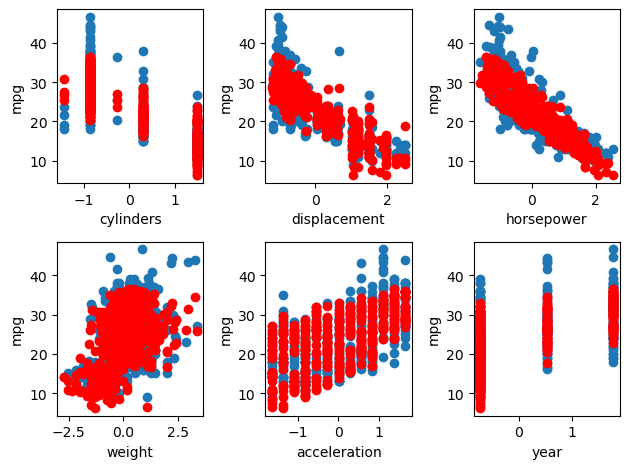

In [23]:
fig, ax = plt.subplots(2, 3)
ax[0,0].scatter(X[:,0],Y);
ax[0,0].scatter(X[:,0],Y_pred,color='red');
ax[0,0].set_xlabel('cylinders');
ax[0,0].set_ylabel('mpg');

ax[0,1].scatter(X[:,1],Y);
ax[0,1].scatter(X[:,1],Y_pred,color='red');
ax[0,1].set_xlabel('displacement');
ax[0,1].set_ylabel('mpg');

ax[0,2].scatter(X[:,3],Y);
ax[0,2].scatter(X[:,3],Y_pred,color='red');
ax[0,2].set_xlabel('horsepower');
ax[0,2].set_ylabel('mpg');

ax[1,0].scatter(X[:,4],Y);
ax[1,0].scatter(X[:,4],Y_pred,color='red');
ax[1,0].set_xlabel('weight');
ax[1,0].set_ylabel('mpg');

ax[1,1].scatter(X[:,5],Y);
ax[1,1].scatter(X[:,5],Y_pred,color='red');
ax[1,1].set_xlabel('acceleration');
ax[1,1].set_ylabel('mpg');

ax[1,2].scatter(X[:,6],Y);
ax[1,2].scatter(X[:,6],Y_pred,color='red');
ax[1,2].set_xlabel('year');
ax[1,2].set_ylabel('mpg');

plt.tight_layout();

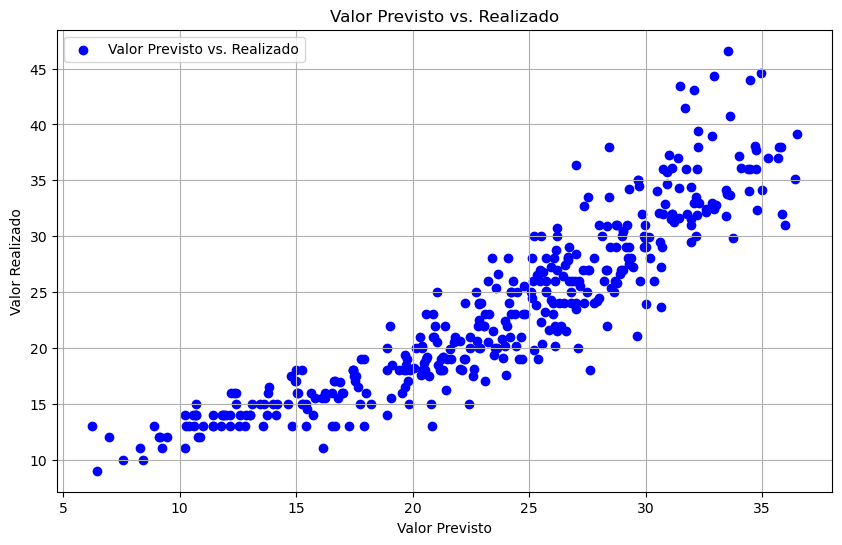

In [30]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, Y, color='blue', label='Valor Previsto vs. Realizado')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Realizado')
plt.title('Valor Previsto vs. Realizado')
plt.legend()
plt.grid(True)
plt.show()

In [24]:

# Coeficientes do modelo
coeficientes = modelo_final.coef_


# Variáveis
variaveis = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']

# Criar um DataFrame para visualização
df_coeficientes = pd.DataFrame({'Variável': variaveis, 'Coeficiente': coeficientes})

# Ordenar os coeficientes por magnitude
df_coeficientes = df_coeficientes.reindex(df_coeficientes['Coeficiente'].abs().sort_values(ascending=False).index)

# Imprimir os coeficientes
print(df_coeficientes)


       Variável  Coeficiente
3        weight    -5.490156
5          year     2.761914
1  displacement     2.074280
6        origin     1.146845
0     cylinders    -0.838376
2    horsepower    -0.651041
4  acceleration     0.221632
